# Class Workbook

## In class activity

In [9]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
#import ISLP as islp

### Ames Housing data

Please take a look at the Ames Hoursing data.

In [3]:
ames_raw=pd.read_csv("ames_raw.csv")

### Questions

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [4]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [19]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Here are few rules:

- You are not allowed to use the test data.
- Try 3 of the regularization methods discussed in Ch6.
- You should use a resampling method that is most appropriate for choosing the hyper parameters.

Your code:

In [17]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler

X = ames_raw_2008[['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold']]
y = ames_raw_2008['SalePrice']

# Standardize the predictor matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
# X_test = scaler.transform(ames_raw_2009[['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
#        '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
#        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
#        'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
#        '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold']])

lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)

lasso.fit(X, y)
ridge.fit(X, y)
elastic_net.fit(X, y)

lasso_coefficients = lasso.coef_
ridge_coefficients = ridge.coef_
elastic_net_coefficients = elastic_net.coef_

print("Lasso coefficients:", lasso_coefficients)
print("Ridge coefficients:", ridge_coefficients)
print("Elastic Net coefficients:", elastic_net_coefficients)

Lasso coefficients: [ 8.66351908e-01  2.03677415e+04  4.81832505e+03  5.23490227e+02
  7.34930467e+01  8.71718953e+01  6.23081501e+01  1.63357737e+01
  7.68794941e+00 -4.28318149e+03 -4.45035988e+03 -8.25994148e+03
 -2.38446835e+04  1.08026556e+03  2.33600044e+03  3.21357472e+01
 -4.25439549e+01  9.71177867e+00  1.38101552e+01  9.00742142e+01
 -4.04238252e-01 -1.28012014e+01  3.89621996e+02]
Ridge coefficients: [ 8.66678038e-01  2.03686007e+04  4.82253199e+03  5.23832258e+02
  7.43567552e+01  4.76031648e+01  2.27754385e+01 -2.31126451e+01
  4.72659551e+01 -4.30939589e+03 -4.42024127e+03 -8.24325359e+03
 -2.32797976e+04  1.03735447e+03  2.36279730e+03  3.21980763e+01
 -4.24344286e+01  9.74799087e+00  1.39033974e+01  9.01627094e+01
 -3.74349499e-01 -1.28010760e+01  3.88715033e+02]
Elastic Net coefficients: [ 7.68772809e-01  1.32688104e+04  3.83846754e+03  5.97401337e+02
  2.29595616e+02  9.58231128e+01  6.55050267e+01  2.38388969e+01
  8.38239502e+00 -1.33787193e+03 -4.42659396e+02 -4.54

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.444e+11, tolerance: 8.985e+08


Your answer:

~~~
Please write your answer in full sentences.


~~~

- For each of the models you've run, can you interpret which variable impacts the outcome the most?
Are the results consistent across different methods?

Your code:

In [7]:
# Get the names of the variables
variables = X.columns

# Find the variable with the highest absolute coefficient for each model
lasso_most_impactful = variables[abs(lasso_coefficients).argmax()]
ridge_most_impactful = variables[abs(ridge_coefficients).argmax()]
elastic_net_most_impactful = variables[abs(elastic_net_coefficients).argmax()]

print("Most impactful variable in Lasso:", lasso_most_impactful)
print("Most impactful variable in Ridge:", ridge_most_impactful)
print("Most impactful variable in Elastic Net:", elastic_net_most_impactful)

Most impactful variable in Lasso: Kitchen AbvGr
Most impactful variable in Ridge: Kitchen AbvGr
Most impactful variable in Elastic Net: Overall Qual


Your answer:

~~~
Please write your answer in full sentences.


~~~

- Try these methods with bootstrap, are the results consistent?

Your code:

In [9]:
from sklearn.utils import resample

# Number of bootstrap samples to create
n_bootstrap = 1000

# DataFrames to store the coefficients for each bootstrap sample
lasso_coefs = pd.DataFrame(index=range(n_bootstrap), columns=X.columns)
ridge_coefs = pd.DataFrame(index=range(n_bootstrap), columns=X.columns)
elastic_net_coefs = pd.DataFrame(index=range(n_bootstrap), columns=X.columns)

lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)

# Create bootstrap samples and fit the models
for i in range(n_bootstrap):
    X_resample, y_resample = resample(X, y)
    
    scaler = StandardScaler()
    X_resample = scaler.fit_transform(X_resample)
    
    lasso.fit(X_resample, y_resample)
    ridge.fit(X_resample, y_resample)
    elastic_net.fit(X_resample, y_resample)
    
    lasso_coefs.loc[i] = lasso.coef_
    ridge_coefs.loc[i] = ridge.coef_
    elastic_net_coefs.loc[i] = elastic_net.coef_

# Calculate the mean and standard deviation of the coefficients for each variable
lasso_coefs_mean = lasso_coefs.mean()
lasso_coefs_std = lasso_coefs.std()

ridge_coefs_mean = ridge_coefs.mean()
ridge_coefs_std = ridge_coefs.std()

elastic_net_coefs_mean = elastic_net_coefs.mean()
elastic_net_coefs_std = elastic_net_coefs.std()

print("Lasso coefficients mean:", lasso_coefs_mean)
print("Lasso coefficients std:", lasso_coefs_std)

print("Ridge coefficients mean:", ridge_coefs_mean)
print("Ridge coefficients std:", ridge_coefs_std)

print("Elastic Net coefficients mean:", elastic_net_coefs_mean)
print("Elastic Net coefficients std:", elastic_net_coefs_std)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+09, tolerance: 9.342e+08
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+09, tolerance: 1.022e+09
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.221e+09, tolerance: 9.485e+08
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

Lasso coefficients mean: Lot Area            6618.490871
Overall Qual       28251.679104
Overall Cond        4905.008176
Year Built         15505.512802
Year Remod/Add      1415.013580
1st Flr SF         35098.891132
2nd Flr SF         27440.989205
Low Qual Fin SF      677.160859
Gr Liv Area         4200.773442
Full Bath          -2677.795794
Half Bath          -2148.448959
Bedroom AbvGr      -7405.886316
Kitchen AbvGr      -4996.562976
TotRms AbvGrd       2444.179288
Fireplaces          1274.973854
Wood Deck SF        4328.047321
Open Porch SF      -2601.542408
Enclosed Porch       630.313694
3Ssn Porch           196.103042
Screen Porch        4705.348908
Pool Area           -233.874147
Misc Val           -8306.039901
Mo Sold             1190.581925
dtype: float64
Lasso coefficients std: Lot Area           1519.416562
Overall Qual       2345.706357
Overall Cond       1050.182989
Year Built         1740.491251
Year Remod/Add     1455.816500
1st Flr SF         4655.456886
2nd Flr SF    

Your answer:

~~~
Please write your answer in full sentences.


~~~

- Based on all the models you've run, which result predicts the best?  Which one is most easy to understand?  Which method gives the most stable results?

Your code:

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = ames_raw_2009[['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold']]
y_test = ames_raw_2009['SalePrice']

# Scale the test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Predict the target variable for the test data
lasso_predictions = lasso.predict(X_test)
ridge_predictions = ridge.predict(X_test)
elastic_net_predictions = elastic_net.predict(X_test)

# Calculate the MSE and R-squared for each model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)

lasso_r2 = r2_score(y_test, lasso_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)

print("Lasso MSE:", lasso_mse, "R2:", lasso_r2)
print("Ridge MSE:", ridge_mse, "R2:", ridge_r2)
print("Elastic Net MSE:", elastic_net_mse, "R2:", elastic_net_r2)

Lasso MSE: 1343504947.3395264 R2: 0.776630010960136
Ridge MSE: 1345577067.9973917 R2: 0.7762855019432149
Elastic Net MSE: 1318403923.5611014 R2: 0.7808032858091636


Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### Best Subset

In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

(a) Use the `normal()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.

Your code:

In [4]:
np.random.seed(0)
X = np.random.normal(size=100)
epsilon = np.random.normal(size=100)

(b) Generate a response vector $Y$ of length $n = 100$ according to the model $$\mathbf{y} = \boldsymbol{\beta}_0 + \beta_1X + \beta2X^2 + \beta_3X^3 + \epsilon$$, where $\beta_{0}$ , $\beta_{1}$, $\beta_{2}$, and $\beta_{3}$ are constants of your choice.

Your code:

In [5]:
beta_0 = 1
beta_1 = 2
beta_2 = 3
beta_3 = 4

Y = beta_0 + beta_1*X + beta_2*X**2 + beta_3*X**3 + epsilon

(c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X$, $X^{2},\dots,X^{10}$. What is the best model obtained according to $C_p$ , BIC, and adjusted $R^2$ ? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.

Your code:

In [6]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.DataFrame({f'X^{i}': X**i for i in range(1, 11)})
df['Y'] = Y
X_train, X_test, y_train, y_test = train_test_split(df.drop('Y', axis=1), df['Y'], test_size=0.2, random_state=0)

best_mse = float('inf')
best_r2 = 0
best_model = None
best_combination = None

for r in range(1, len(df.columns)):
    for combination in itertools.combinations(df.drop('Y', axis=1).columns, r):
        
        model = LinearRegression()
        model.fit(X_train[list(combination)], y_train)
        
        predictions = model.predict(X_test[list(combination)])
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        if mse < best_mse or r2 > best_r2:
            best_mse = mse
            best_r2 = r2
            best_model = model
            best_combination = combination

print("Best model predictors:", best_combination)
print("Best model coefficients:", best_model.coef_)

Best model predictors: ('X^2', 'X^3', 'X^5', 'X^8', 'X^10')
Best model coefficients: [ 2.56309500e+00  5.68692397e+00 -2.75919650e-01  2.18256274e-02
 -3.67304543e-03]


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

Your code:

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = LinearRegression()

# Forward
sfs_forward = SFS(model, 
                  k_features=(1, len(df.columns)-1), 
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error',
                  cv=0)

sfs_forward = sfs_forward.fit(df.drop('Y', axis=1), df['Y'])

# Backward
sfs_backward = SFS(model, 
                   k_features=(1, len(df.columns)-1), 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=0)

sfs_backward = sfs_backward.fit(df.drop('Y', axis=1), df['Y'])

print("Best model (forward selection):", sfs_forward.k_feature_names_)
print("Best model (backward selection):", sfs_backward.k_feature_names_)

Best model (forward selection): ('X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10')
Best model (backward selection): ('X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10')


Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Now fit a lasso model to the simulated data, again using $X$, $X^{2},\dots, X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.

Your code:

In [ ]:
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(df.drop('Y', axis=1), df['Y'])

print("Optimal alpha:", lasso_cv.alpha_)
print("Coefficient estimates:", lasso_cv.coef_)

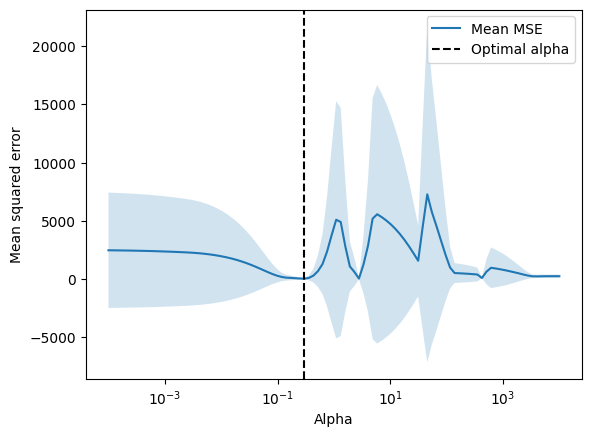

In [12]:
mse_means = np.mean(lasso_cv.mse_path_, axis=1)
mse_stds = np.std(lasso_cv.mse_path_, axis=1)
plt.semilogx(lasso_cv.alphas_, mse_means, label='Mean MSE')
plt.fill_between(lasso_cv.alphas_, mse_means - mse_stds, mse_means + mse_stds, alpha=0.2)
plt.axvline(lasso_cv.alpha_, linestyle='--', color='k', label='Optimal alpha')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Now generate a response vector Y according to the model $$Y = \beta_{0} + \beta_{7}X^{7} + \epsilon,$$and perform best subset selection and the lasso. Discuss the results obtained.

Your code:

In [14]:
beta_0 = 1
beta_7 = 2

Y = beta_0 + beta_7*(X**7) + epsilon

df['Y'] = Y
best_mse = float('inf')
best_model = None
best_combination = None

for r in range(1, len(df.columns)):
    for combination in itertools.combinations(df.drop('Y', axis=1).columns, r):
        
        model = LinearRegression()
        model.fit(df[list(combination)], df['Y'])
        
        predictions = model.predict(df[list(combination)])
        mse = mean_squared_error(df['Y'], predictions)
        
        if mse < best_mse:
            best_mse = mse
            best_model = model
            best_combination = combination

print("Best model predictors (best subset selection):", best_combination)
print("Best model coefficients (best subset selection):", best_model.coef_)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(df.drop('Y', axis=1), df['Y'])

print("Optimal alpha (lasso):", lasso_cv.alpha_)
print("Coefficient estimates (lasso):", lasso_cv.coef_)
#

Best model predictors (best subset selection): ('X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10')
Best model coefficients (best subset selection): [-0.10252906 -1.3865441  -0.79907309  1.13573157  1.2122696  -0.32104323
  1.57761883  0.02194905  0.04159304  0.00178827]
Optimal alpha (lasso): 0.03853528593710531
Coefficient estimates (lasso): [ 0.47217815 -1.17129018 -3.5102846   1.26102896  3.55090551 -0.35554031
  0.90439494 -0.00357833  0.1025845   0.00724169]


Your answer:

~~~
Please write your answer in full sentences.


~~~

### College

In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [26]:
from ISLP import load_data
College = load_data("College")

(a) Split the data set into a training set and a test set.

Your code:

In [16]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [27]:
from sklearn.model_selection import train_test_split

X = College[['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']]
Y = College['Apps']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


(b) Fit a linear model using least squares on the training set, and report the test error obtained.

Your code:

In [31]:
Collegefit = sm.OLS(y_train, sm.add_constant(X_train)).fit()
test_error = mean_squared_error(y_test, Collegefit.predict(sm.add_constant(X_test)))
print("Test error:", test_error)

Test error: 1182113.6667499898


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.


Your code:

In [36]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)

ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
non_zero_coefs = np.sum(ridge_cv.coef_ != 0)

print("Test error:", test_error)

Test error: 1176582.2777169177


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Fit a lasso model on the training set, with $\lambda$ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

Your code:

In [33]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)

lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
non_zero_coefs = np.sum(lasso_cv.coef_ != 0)

print("Test error:", test_error)
print("Number of non-zero coefficients:", non_zero_coefs)

Test error: 1179086.2236392866
Number of non-zero coefficients: 16


Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


Your code:

In [37]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

n_components = X_train.shape[1]

best_score = -np.inf
best_m = None

for m in range(1, n_components + 1):

    pcr = make_pipeline(PCA(n_components=m), LinearRegression())
    scores = cross_val_score(pcr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_m = m

best_pcr = make_pipeline(PCA(n_components=best_m), LinearRegression())
best_pcr.fit(X_train, y_train)

y_pred = best_pcr.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)
print("Optimal number of components:", best_m)

Test error: 1195536.8254705518
Optimal number of components: 15


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.


Your code:

In [38]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

n_components = min(X_train.shape)
best_score = -np.inf
best_m = None

for m in range(1, n_components + 1):
    
    pls = PLSRegression(n_components=m)
    
    scores = cross_val_score(pls, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)    

    if mean_score > best_score:
        best_score = mean_score
        best_m = m

best_pls = PLSRegression(n_components=best_m)
best_pls.fit(X_train, y_train)
y_pred = best_pls.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)

print("Test error:", test_error)
print("Optimal number of components:", best_m)

Test error: 1195665.590741407
Optimal number of components: 9


Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?


Your code:

In [39]:
test_error_dict = {}

test_error = mean_squared_error(y_test, Collegefit.predict(sm.add_constant(X_test)))
test_error_dict['OLS'] = test_error

test_error = mean_squared_error(y_test, ridge_cv.predict(X_test))
test_error_dict['Ridge'] = test_error

test_error = mean_squared_error(y_test, lasso_cv.predict(X_test))
test_error_dict['Lasso'] = test_error

test_error = mean_squared_error(y_test, best_pcr.predict(X_test))
test_error_dict['PCR'] = test_error

test_error = mean_squared_error(y_test, best_pls.predict(X_test))
test_error_dict['PLS'] = test_error

In [40]:
for model, error in test_error_dict.items():
    print(f"{model} test error:", error)

OLS test error: 1182113.6667499898
Ridge test error: 1176582.2777169177
Lasso test error: 1179086.2236392866
PCR test error: 1195536.8254705518
PLS test error: 1195665.590741407


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Features

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

(a) Generate a data set with (p = 20) features, (n = 1,000) observations, and an associated quantitative response vector generated according to the model $$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$, where ($\boldsymbol{\beta}$) has some elements that are exactly equal to zero.

Your code:

In [23]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Split your data set into a training set containing (100) observations and a test set containing (900) observations.


Your code:

In [24]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

Your code:

In [25]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Plot the test set MSE associated with the best model of each size.

Your code:

In [26]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~
(e) For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

Your code:

In [27]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.


Your code:

In [28]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Create a plot displaying $\sqrt{\sum_{j=1}^{p}(\beta_{j}-\hat{\beta}_{j}^{r})^{2}}$ for a range of values of ($r$), where $\hat{\beta}_{j}^{r}$ is the $j$th coefficient estimate for the best model containing ($r$) coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?


Your code:

In [29]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Boston

We will now try to predict per capita crime rate in the Boston data set.

In [30]:
Boston = load_data("Boston")

(a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.


Your code:

In [31]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, crossvalidation, or some other reasonable alternative, as opposed to using training error.


Your code:

In [32]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Does your chosen model involve all of the features in the data set? Why or why not?


Your code:

In [33]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~



~~~

## Additional Material

### [Advanced] Regularized Regression using Predictive Modeling Platforms in R

#### scikit-learn

Sklearn is probably the goto for most of what you will do on your computer.
Many ways of doing the parameter tuning is described in the lab for your ISLP textbook.

In [34]:
from sklearn.model_selection import train_test_split
# split the data
X_train0, X_test, y_train0, y_test = train_test_split(ames_raw.loc[:,ames_raw.columns != "SalePrice"], ames_raw.loc[:,"SalePrice"], test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split( X_train0, y_train0, test_size=0.25, random_state=11)

train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

#### PySpark

[Apache Spark](https://spark.apache.org/docs/3.1.3/api/python/index.html) is a popular large data handling platform.  Over the years, they built Machine Learning capabilities in MLlib.
https://www.machinelearningplus.com/pyspark/pyspark-ridge-regression/

In [35]:
import pyspark
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import tempfile
from ISLP import load_data

In [ ]:
spark = SparkSession.builder.appName("Ridge_test").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/13 12:55:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
Boston = load_data("Boston")
dataset = spark.createDataFrame(Boston)
from pyspark.ml.feature import VectorAssembler
# Define the feature and label columns & Assemble the feature vector
assembler = VectorAssembler(
    inputCols=["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio","lstat"],
    outputCol="features")

dataset = assembler.transform(dataset)
final_data = dataset.select("features", "medv")

# Split the data into training and test sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

ridge_regression = LinearRegression(featuresCol="features", labelCol="medv", elasticNetParam=0)
# Define the hyperparameter grid
param_grid = ParamGridBuilder() \
    .addGrid(ridge_regression.regParam, [0.001, 0.01, 0.1, 1.0]) \
    .build()

# Create the cross-validator
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol= "medv", metricName="rmse")
cross_validator = CrossValidator(estimator=ridge_regression,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=5)

# Train the model with the best hyperparameters
cv_model = cross_validator.fit(train_data)
ridge_model = cv_model.bestModel

coefficients = ridge_model.coefficients
intercept = ridge_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))
# Make predictions on the test data
predictions = ridge_model.transform(test_data)

# Evaluate the model
rmse = evaluator.evaluate(predictions)
r2 = RegressionEvaluator(predictionCol="prediction", labelCol="medv", metricName="r2").evaluate(predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R2):", r2)

##### Save and load the model

In [ ]:
# Save the model
ridge_model.save("ridge_model")

# Load the model
from pyspark.ml.regression import LinearRegressionModel
loaded_model = LinearRegressionModel.load("ridge_model")

##### Stop pyspark

In [ ]:
spark.stop()

#### Regularized regression using h2o

In [ ]:
# load packages and data
import h2o
localH2O = h2o.init(nthreads = -1, max_mem_size="4g")

train_hf = h2o.H2OFrame(train_df)
valid_hf = h2o.H2OFrame(valid_df)
test_hf = h2o.H2OFrame(test_df)

##### Fitting Ridge regression with grid search

H2O has a few hyperparameter search defined.
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#grid-search-in-python

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

predictors = ["SalePrice","Lot Area","Gr Liv Area","Full Bath"]
response = "SalePrice"
glm_h2o_model = H2OGeneralizedLinearEstimator(family="gaussian",
                                      lambda_=0,
                                      compute_p_values=True,
                                      nfolds = 5)
glm_h2o_model.train(x=predictors, y=response, training_frame=train_hf)


hyper_params = {'alpha': [0,0.5,1],
                  'lambda':[10**-7,10**-6,10**-5,10**-4]}

# Train and validate a cartesian grid of GBMs
glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params)
glm_grid1.train(x=predictors, y=response,
                training_frame=train_hf,
                validation_frame=valid_hf,
                seed=1)

# Get the grid results, sorted by validation AUC
glm_gridperf1 = glm_grid1.get_grid(sort_by='r2', decreasing=True)
glm_gridperf1

# Grab the top GBM model, chosen by validation AUC
best_glm1 = glm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_glm_perf1 = best_glm1.model_performance(test_hf)

best_glm_perf1.mse()
# 0.7781778619721595

#prediction=predict(best_model,newdata = test_hf)
#h2o.exportFile(prediction, "/tmp/pred.csv", force = TRUE) #export prediction result as a file


In [ ]:
h2o.shutdown()

## Advanced Content

### Stein's Estimator and shrinkage
So far, we have seen how least squares perform well, even in cases where the true model is not linear.  Then, the natural question we may ask is, can we find an estimator that is better than least squares?  Which <cite data-cite="16598153/A59N9N5V"></cite> worked on, and later <cite data-cite="16598153/M2VTBEWL"></cite> improved upon. It is called the James-Stein estimator or just Stein's estimator.

Stein's estimator is defined as \footnote{In general Stein estimator is $(1-\alpha)\hat{\boldsymbol{\beta}}_{LS}$ for some positive number $\alpha$ less than 1.  }
$$\tilde{\boldsymbol{\beta}}_{stein}=\left(1-\frac{(p-2)\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)\hat{\boldsymbol{\beta}}_{LS}$$.

According to Stein, for $p>2$
\begin{eqnarray*}
E\parallel \tilde{\boldsymbol{\beta}}_{stein} - \boldsymbol{\beta}_{best}\parallel^2\leq E\parallel \tilde{\boldsymbol{\beta}}_{LS} -\boldsymbol{\beta}_{best}\parallel^2
\end{eqnarray*}

To put it in simple English, the estimator obtained by shirking the LS estimator by $\left(1-\frac{(p-2)\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)$ is a better estimator than LS.  This is puzzling if you think carefully about it, given that LS is BLUE. Also, there is not even a tuning parameter. The only thing that seems to matter is $\frac{\sigma^2}{\parallel \hat{\boldsymbol{\beta}}_{LS}\parallel^2}$.  The proof is not hard; you can find it at the bottom.  But the important takeaway message is that we can do better than LS by shrinking the estimates.

### Methods to Control Model Complexity

Regression is used for a variety of problems
  - prediction: stock price in the future
	- estimation: denoising, smoothing
	- understanding: figure out what variable(s) are important

A critical characteristic in all situations is that we want a generalizable model. Thus, we often prefer a simpler model over a complex model (why?).  This principle is called Occam's razor.  (Note that a simpler model does not guarantee generalizability. )
What methods are available for us to control the model complexity?

For orthogonal $X_j$ $j=1,\cdots,p$, we can use the shrinkage method as we saw in the Stein estimator $$\tilde{\boldsymbol{\beta}}=\hat{\boldsymbol{\beta}}_{LS}\left(1-\frac{(p-2)\sigma^2}{\parallel\hat{\boldsymbol{\beta}}_{LS}\parallel^2}\right)$$

Another method is to use a threshold.  There is hard thresholding, where we set all the coefficients that do not pass a certain threshold to zero.
\begin{eqnarray}
\tilde{\beta}_j=\hat{\beta}_j1_{\hat{\beta}_j>\lambda}=\left\{ \begin{array}{ll}
\hat{\beta}_j & \mid\hat{\beta}_j\mid > \lambda\\
0 &\verb|otherwise|\\
\end{array}
\right.
\end{eqnarray}
An alternative is soft thresholding, where we combine shrinkage with hard thresholding.
\begin{eqnarray}
\tilde{\beta}_j=sgn(\hat{\beta}_j)[\mid\hat{\beta}_j\mid-\lambda]_{+}=\left\{ \begin{array}{ll}
\tilde{\beta}_j=\hat{\beta}_j-\lambda & \verb|if |\mid\hat{\beta}_j\mid > \lambda\\
\tilde{\beta}_j=0 & \verb|if |\mid\hat{\beta}_j\mid \leq \lambda \\
\end{array}
\right.
\end{eqnarray}

But what can we do in a more general case where $X$ is not orthogonal or $p$ is bigger than $n$?  One popular thing nowadays is putting a penalty or constraint on the model complexity.  The two most popular ways are the subset selection and shrinkage methods.

#### subset selection

Subset selection is most commonly done by restricting the number of none zero $\tilde{\beta}_j$ to be less than some constant $k$.  But solving that is unfeasible when $p$ is large since it is an N-P hard problem.   In the orthogonal $X$ situation, ordering the $\tilde{\beta}_j$ and choosing $k$ largest subset selection is equivalent to hard thresholding.

#### Shrinkage

For general $X$, we can also perform shrinkage. The idea is to minimize $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta}\parallel^2$ subject to some constraint.  When we set the constraint as $\parallel\boldsymbol{\beta}\parallel^2<t$, the result is called the ridge regression.  Similarly, if we choose the constraint as $\mid\boldsymbol{\beta}\mid<t$, then the result is known as the LASSO (Least Absolute Shrinkage and Selection Operator) regression.  It turns out that this constrained minimization problem can be generalized to minimizing an objective function of the form $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel_{L_p}$ where $\parallel \parallel_{L_p}$ is called the $L_p$ norm and $\lambda$ is the complexity parameter that controls the amount of shrinkage.

##### Ridge Regression

Ridge Regression is used when you don't have collinearity in your predictor variables.  We can consider it a constraint optimization under the $l_2$ norm or shrinkage estimation. So, for a general setting:

observation  | predictor 1     | predictor 2     | $\cdots$ | predictor p     | response
-------------|-----------------|-----------------|----------|-----------------|----------
1            | $x_{11}$        | $x_{12}$        | $\cdots$ | $x_{1p}$        | $y_1$
2            | $x_{21}$        | $x_{22}$        | $\cdots$ | $x_{2p}$        | $y_2$
$\vdots$     | $\vdots$        | $\vdots$        | $\ddots$ | $\vdots$        | $\vdots$
n            | $x_{n1}$        | $x_{n2}$        | $\cdots$ | $x_{np}$        | $y_n$
&nbsp;       | $\mathbf{X}_{1}$| $\mathbf{X}_{2}$| $\cdots$ | $\mathbf{X}_{p}$| $\mathbf{y}$


$$
\mathbf{X}=\left[
\begin{array}{cccc}
\mathbf{X}_{1}&\mathbf{X}_{2}&\cdots &\mathbf{X}_{p} \\
\end{array}
\right]\verb|, and |
\boldsymbol{\beta}=\left[
\begin{array}{c}
\beta_{1} \\
\vdots\\
\beta_{p} \\
\end{array}
\right]
$$

 To find the ridge regression estimate, we want to minimize the objective function of form $\left(\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda\parallel \boldsymbol{\beta}\parallel^2\right)$.  As constrained optimization, we want to minimize $\parallel \mathbf{y}-\mathbf{X}\beta \parallel^2$ subject to $\parallel \boldsymbol{\beta} \parallel^2 \leq t$ constraint for some constant $t$.



 Imagine a contour defined by $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ with its lowest at $\hat{\boldsymbol{\beta}}_{LS}$.  Now imagine a circle around the origin where the diameter is defined by a tuning parameter $t$ such that it satisfies $\parallel \boldsymbol{\beta} \parallel^2 <t$.  Our solution can only be inside this circle.  Without any constraint on $t$, i.e. $t=\infty$ we will get $\hat{\boldsymbol{\beta}}_{LS}$ as an estimate that minimizes $\parallel \mathbf{y}-\mathbf{X}\beta \parallel^2$. But as t gets smaller, we depart from our $\hat{\boldsymbol{\beta}}_{LS}$ since the solution has to be within the circle.  Thus, we can see that the solution we want is on the circle closest to $\hat{\boldsymbol{\beta}}_{LS}$, which is the point circle that touches the ellipse.  Equivalently, our solution can be thought of as shrinkage.  As t gets smaller, we are shrinking our $\hat{\boldsymbol{\beta}}_{LS}$  toward zero on the diagonal line from $\hat{\boldsymbol{\beta}}_{LS}$ to the origin.

 ![Ridge Image](Images/Ridge.png)


So lets solve for $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel^2$
\begin{eqnarray*}
\frac{\partial }{\partial \boldsymbol{\beta}}\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda \parallel \boldsymbol{\beta} \parallel^2&=&-2( \mathbf{y}-\mathbf{X}\boldsymbol{\beta})X +2\lambda\boldsymbol{\beta}\\
&\Rightarrow&  -\mathbf{y}^T\mathbf{X}+\hat{\boldsymbol{\beta}}\mathbf{X}^T\mathbf{X} + \lambda\hat{\boldsymbol{\beta}}=0\\
&=& \hat{\boldsymbol{\beta}}(\mathbf{X}^T\mathbf{X} +\lambda I)=\mathbf{y}^TX\\
&=& \hat{\boldsymbol{\beta}}=(\mathbf{X}^T\mathbf{X} +\lambda I)^{-1}\mathbf{y}^TX\\
\end{eqnarray*}
Hence we see $\hat{\boldsymbol{\beta}}_{pythonidge}=(\mathbf{X}^T\mathbf{X} +\lambda \mathbf{I})^{-1}\mathbf{y}^T\mathbf{X}$.

##### LASSO (Least Absolute Shrinkage and Selection Operator)

The idea of LASSO is similar to Ridge Regression. Using the same setting as before, the only difference is we want to minimize an objective function of the form $\left(\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2+\lambda\mid \boldsymbol{\beta}\mid\right)$ or equivalently perform constraint minimization of $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ subject to $\mid \boldsymbol{\beta} \mid\leq t$ constraint ($\mid \boldsymbol{\beta} \mid=\sum^p_{j=1}\mid \beta_j\mid$).

Geometrically speaking (for $p=2$ case) we want to find $\hat{\boldsymbol{\beta}}$ that is closest to $\hat{\boldsymbol{\beta}}_{LS}$ within the diamond shaped region that is $\mid \boldsymbol{\beta} \mid<t$.
Unlike $L_2$ norm, $L_1$ norm has corners and edges that touch the contour of $\parallel \mathbf{y}-\mathbf{X}\boldsymbol{\beta} \parallel^2$ first most of the time.  This acts as the variable selector in high-dimensional space.  Thus, when we look at the solution path of LASSO, we see some coefficients take on the value of zero.

 ![Lasso Image](Images/Lasso.png)

As $t$ increases, we gradually see more and more $\boldsymbol{\beta}$s coming into our model.  And this goes on until all $t$ is so big that the diamond shaped region includes $\hat{\boldsymbol{\beta}}_{LS}$, in which case, all the estimates of $\hat{\boldsymbol{\beta}}$ becomes $\hat{\boldsymbol{\beta}}_{LS}$.  Or conversely, if you decrease your $t$, to zero your estimated  $\hat{\boldsymbol{\beta}}$ starts to get shrunk toward zero from $\hat{\boldsymbol{\beta}}_{LS}$.  So you can see that we are doing shrinkage estimation. Then, we want to choose $t$ to get the sparsest model with the lowest cross-validation error.

 ![Lasso Path Image](Images/Lasso_path.png)

### Proofs

#### Stein's lemma
We first need Stein's lemma.`
\noindent{\bf Stein's Lemma}
According to Stein's lemma, for $Z\sim N\left(\mu,\sigma^2\right)$, $E\left[(z-\mu)g(z)\right]=\sigma^2E\left[g'(z)\right]$.
\subsubsection*{proof}
\begin{eqnarray*}
E\left[(z-\mu)g(z)\right]&=&\int(z-\mu)g(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}dz\\
&=&-\sigma^2g(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}\Bigr|^{\infty}_{-\infty}+\sigma^2\int g'(z)\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(z-\mu)^2}{2\sigma^2}}\\
&=&\sigma^2E\left[g'(z)\right]
\end{eqnarray*}

#### Proof: Stein's estimator outperforms LS

We are ready to prove that Stein's estimator outperforms the least square's estimate.  We will denote for the simplicity $\hat{\boldsymbol{\beta}}_{LS} = \boldsymbol{\beta}$ and $\boldsymbol{\beta}_{best} =\boldsymbol{\theta}$.
\begin{eqnarray*}
E\parallel \boldsymbol{\beta}-\boldsymbol{\theta} \parallel ^2&=&E\left[\sum^p_{i=1}\left( \beta_i-\theta_i \right)^2\right]\\
&=&p\sigma^2
\end{eqnarray*}
\begin{eqnarray*}
E\left[\Biggl|\Biggl|\left(1-\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\right)\boldsymbol{\beta} -\boldsymbol{\theta} \Biggr|\Biggr| ^2\right]&=&E\left[\Biggl|\Biggl| (\boldsymbol{\beta}-\boldsymbol{\theta})-\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta}\Biggr|\Biggr|^2\right]\\
&=&E\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2+E\left[\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]-2E\left[ \langle \boldsymbol{\beta}-\boldsymbol{\theta}, \frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta} \rangle \right]=(*)\\
\end{eqnarray*}
Since $E\left[ \langle \boldsymbol{\beta}-\theta, \frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta} \rangle \right]$ can be simplified as follows
\begin{eqnarray*}
E\left[\sum^p_{i=1}(\boldsymbol{\beta}_i-\theta_i)\frac{(p-2)\sigma^2}{\parallel \boldsymbol{\beta}\parallel^2}\boldsymbol{\beta}_i \right] &=& E\left[\sum^p_{i=1}(\boldsymbol{\beta}_i-\theta_i)\frac{(p-2)\sigma^2}{ \boldsymbol{\beta}_i^2+\sum^p_{j\neq i} \boldsymbol{\beta}_j^2}\boldsymbol{\beta}_i \right]\\
\end{eqnarray*}
Letting $\frac{(p-2)\sigma^2}{ \boldsymbol{\beta}_i^2+\sum^p_{j\neq i} \boldsymbol{\beta}_j^2}\boldsymbol{\beta}_i=g(x_i)$, we can use Stein's lemma. Hence
\begin{eqnarray*}
 E\left[\sum^p_{i=1}(\beta_i-\theta_i)\frac{(p-2)\sigma^2}{ \beta_i^2+\sum^p_{j\neq i} \beta_j^2}\beta_i \right]&=& \sigma^2\sum^p_{i=1}E\left[\left(\frac{(p-2)\sigma^2}{ \beta_i^2+\sum^p_{j\neq i} \beta_j^2}\beta_i \right)'\right]\\
&=&\sigma^2\sum^p_{i=1} E\left[\frac{(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}- \frac{(p-2)\sigma^2 2\beta_i^2}{ \parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&\sigma^2E\left[\frac{p(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}- \frac{2(p-2)\sigma^2}{ \parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&E\left[\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]
\end{eqnarray*}

Therefore:
\begin{eqnarray*}
(*)&=&E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2+\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}-2\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]\\
&=&E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2-\frac{(p-2)^2\sigma^4}{\parallel \boldsymbol{\beta}\parallel^2}\right]\leq E\left[\parallel\boldsymbol{\beta}-\boldsymbol{\theta}\parallel^2\right] = p\sigma^2
\end{eqnarray*}

### Reference